## CNN  en sepecifier une station

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import  mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import layers , callbacks,optimizers,models
import matplotlib.pyplot as plt

traite time serise data 

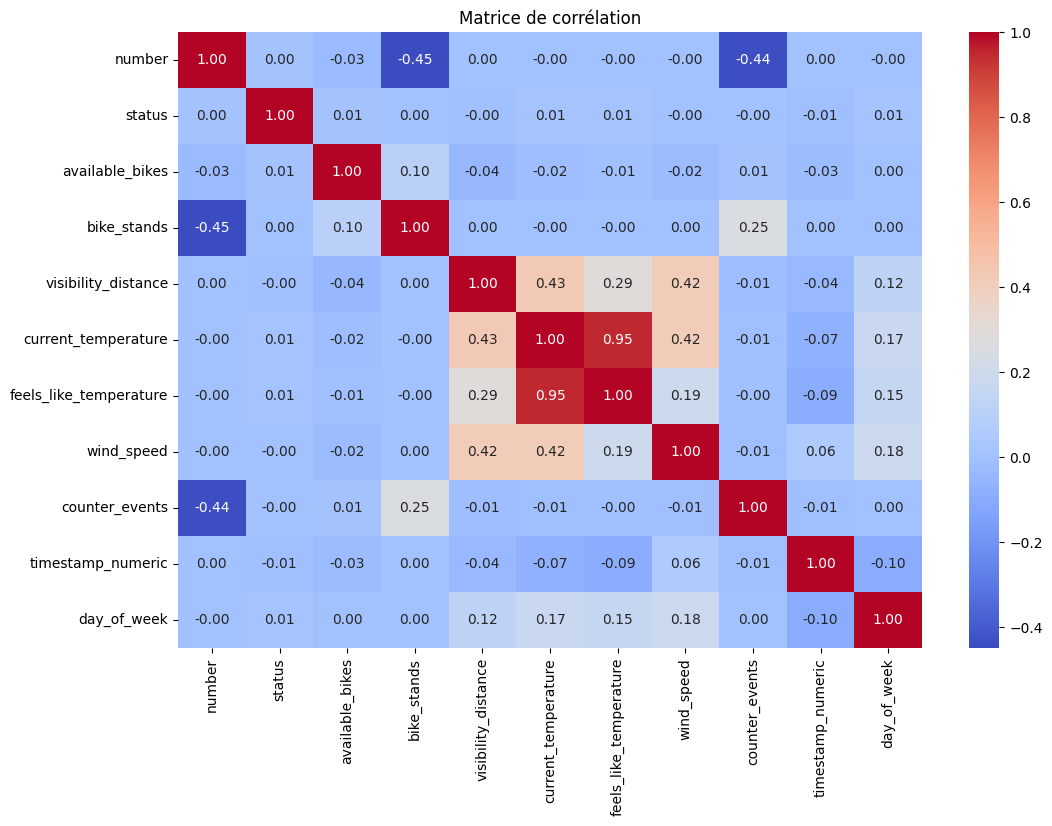

In [9]:

from sklearn.discriminant_analysis import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold


file_path = 'merged_all_bikes_weather_events.csv'
data = pd.read_csv(file_path)
data['timestamp'] = pd.to_datetime(data['timestamp'])
data['timestamp_numeric'] = data['timestamp'].astype('int64') // 10**9 ##en secondes UNIX
data['day_of_week'] = pd.to_datetime(data['timestamp']).dt.dayofweek
data = data.drop(columns=['timestamp','is_rainy','available_bike_stands'])


plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

grouped = data.groupby('number')
group = grouped.get_group(44)  
group=group.sort_index()

X = group.drop(columns=['available_bikes'])
y = group['available_bikes']
    
standardScale_feature=['status','visibility_distance','current_temperature','feels_like_temperature','wind_speed','counter_events','timestamp_numeric','day_of_week']

scaler_x = StandardScaler()
data_x_scaled = X.copy()
data_x_scaled[standardScale_feature] = scaler_x.fit_transform(X[standardScale_feature])
y_scaled = y.values.reshape(-1, 1)
x_scaled = data_x_scaled.values



In [43]:
def taux_correct_predictions(y_test,y_pred,tolerance):
    correct_predictions = np.abs(y_test - y_pred) <= tolerance
    accuracy = np.mean(correct_predictions) * 100  # Convertir en pourcentage
    print(f"Le taux de précision correctes de test avec tolerance={tolerance}: {accuracy:.2f}%")

# Random Forest

Random Forest 
Validation Metrics: MSE=0.7369, MAE=0.5678, R²=0.9115
Test Metrics: MSE=0.9231, MAE=0.5385, R²=0.8922
Le taux de précision correctes de test avec tolerance=0: 12.00%
Le taux de précision correctes de test avec tolerance=1: 32.78%
Le taux de précision correctes de test avec tolerance=2: 48.96%


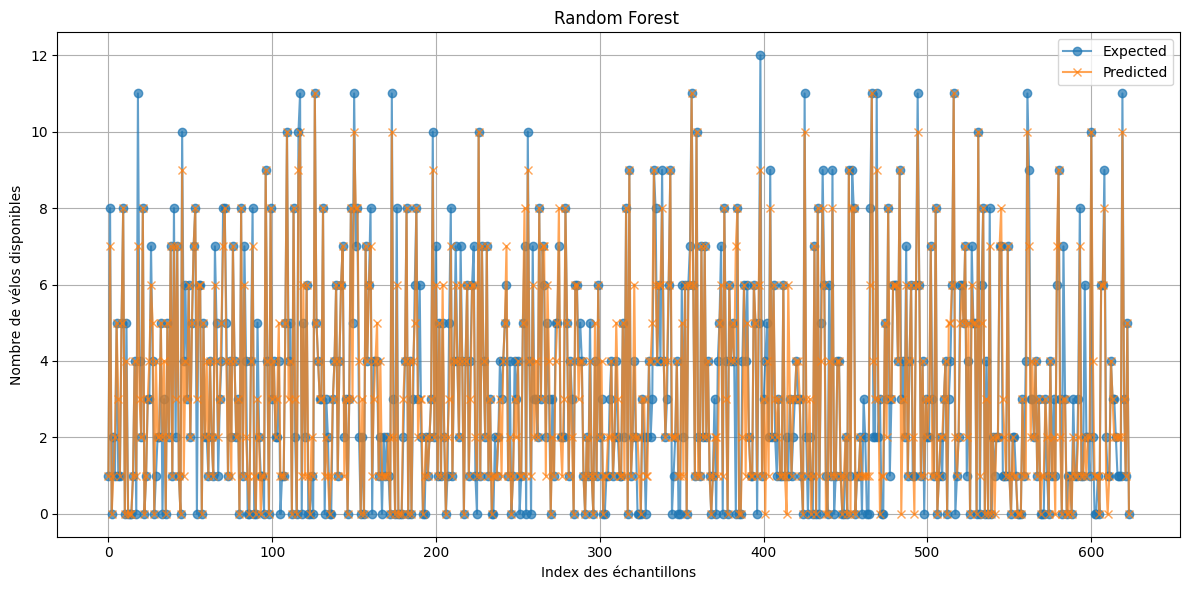

"\n# 4. Analyser l'importance des features\nfeature_importances = rf_model.feature_importances_\nfeature_names = data_x_scaled.columns  # Noms des features\nimportance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# Visualiser les importances\nplt.figure(figsize=(10, 6))\nplt.barh(importance_df['Feature'], importance_df['Importance'])\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance (Random Forest)')\nplt.gca().invert_yaxis()\nplt.show()\n\nprint(importance_df)\n"

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
model="Random Forest "
print(model)
test_size = 0.2  # 20% pour le test
val_size = 0.2   # 20% pour validation  
 
X_train_full, X_test, y_train_full, y_test = train_test_split(x_scaled, y_scaled, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_size, random_state=42)


# 2. Entraîner le modèle Random Forest
rf_model = RandomForestRegressor(
    n_estimators=100,  
    max_depth=None,    
    random_state=42,
    n_jobs=-1           
)
rf_model.fit(X_train, y_train.ravel())  # Entraînement

 
# Validation
y_val_pred = rf_model.predict(X_val)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred) 

print(f"Validation Metrics: MSE={val_mse:.4f}, MAE={val_mae:.4f}, R²={val_r2:.4f}") 

# Test
y_test_pred = rf_model.predict(X_test)
y_test_pred = np.round(y_test_pred).astype(int)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"Test Metrics: MSE={test_mse:.4f}, MAE={test_mae:.4f}, R²={test_r2:.4f}")
taux_correct_predictions(y_test,y_test_pred,0)
taux_correct_predictions(y_test,y_test_pred,1)
taux_correct_predictions(y_test,y_test_pred,2)



# Tracer les résultats pour comparer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Expected', linestyle='-', marker='o', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', linestyle='-', marker='x', alpha=0.7)

# Ajout des détails au graphique
plt.title(model)
plt.xlabel("Index des échantillons")
plt.ylabel("Nombre de vélos disponibles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


'''
# 4. Analyser l'importance des features
feature_importances = rf_model.feature_importances_
feature_names = data_x_scaled.columns  # Noms des features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

print(importance_df)
'''


# Adaboost

adaboost_model
Validation Metrics: MSE=5.1844, MAE=1.8577, R²=0.3772
Test Metrics: MSE=5.0705, MAE=1.8173, R²=0.4077
Le taux de précision correctes de test avec tolerance=0: 9.97%
Le taux de précision correctes de test avec tolerance=1: 32.98%
Le taux de précision correctes de test avec tolerance=2: 50.94%


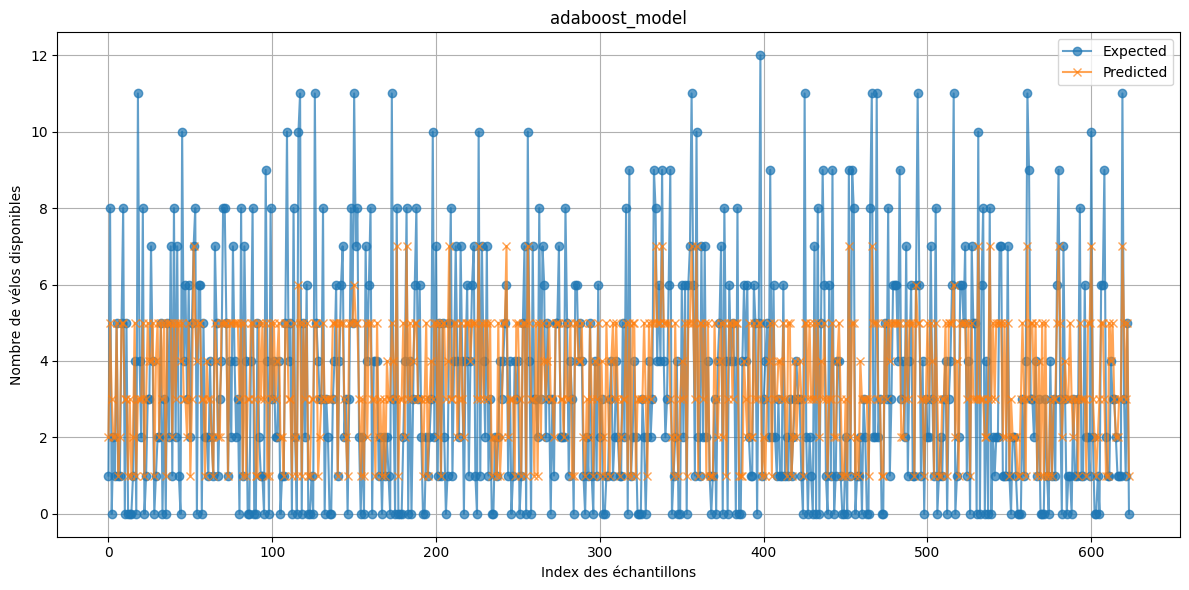

"\n# 4. Analyser l'importance des features\nfeature_importances = rf_model.feature_importances_\nfeature_names = data_x_scaled.columns  # Noms des features\nimportance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# Visualiser les importances\nplt.figure(figsize=(10, 6))\nplt.barh(importance_df['Feature'], importance_df['Importance'])\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance (Random Forest)')\nplt.gca().invert_yaxis()\nplt.show()\n"

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
model="adaboost_model"
print(model)
# 1. Division des données en train, validation, et test
test_size = 0.2  # 20% pour le test
val_size = 0.2   # 20% pour validation

X_train_full, X_test, y_train_full, y_test = train_test_split(x_scaled, y_scaled, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_size, random_state=42)



# 2. Entraîner le modèle AdaBoost
adaboost_model = AdaBoostRegressor(
    n_estimators=120,  # Nombre d'estimateurs
    learning_rate=0.8,  # Taux d'apprentissage
    random_state=42
)
adaboost_model.fit(X_train, y_train.ravel())  # Entraînement

# 3. Validation
y_val_pred = adaboost_model.predict(X_val)
y_val_pred = np.round(y_val_pred).astype(int)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print(f"Validation Metrics: MSE={val_mse:.4f}, MAE={val_mae:.4f}, R²={val_r2:.4f}") 

# 4. Test
y_test_pred = adaboost_model.predict(X_test)
y_test_pred = np.round(y_test_pred).astype(int)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Metrics: MSE={test_mse:.4f}, MAE={test_mae:.4f}, R²={test_r2:.4f}")
taux_correct_predictions(y_test,y_test_pred,0)
taux_correct_predictions(y_test,y_test_pred,1)
taux_correct_predictions(y_test,y_test_pred,2)
 

# Tracer les résultats pour comparer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Expected', linestyle='-', marker='o', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', linestyle='-', marker='x', alpha=0.7)

# Ajout des détails au graphique
plt.title(model)
plt.xlabel("Index des échantillons")
plt.ylabel("Nombre de vélos disponibles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


'''
# 4. Analyser l'importance des features
feature_importances = rf_model.feature_importances_
feature_names = data_x_scaled.columns  # Noms des features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()
'''

# GradientBoost 

GradientBoost
Validation Metrics: MSE=2.0421, MAE=1.0842, R²=0.7547
Test Metrics: MSE=2.2212, MAE=1.1122, R²=0.7406
Le taux de précision correctes de test avec tolerance=0: 11.66%
Le taux de précision correctes de test avec tolerance=1: 34.88%
Le taux de précision correctes de test avec tolerance=2: 51.65%


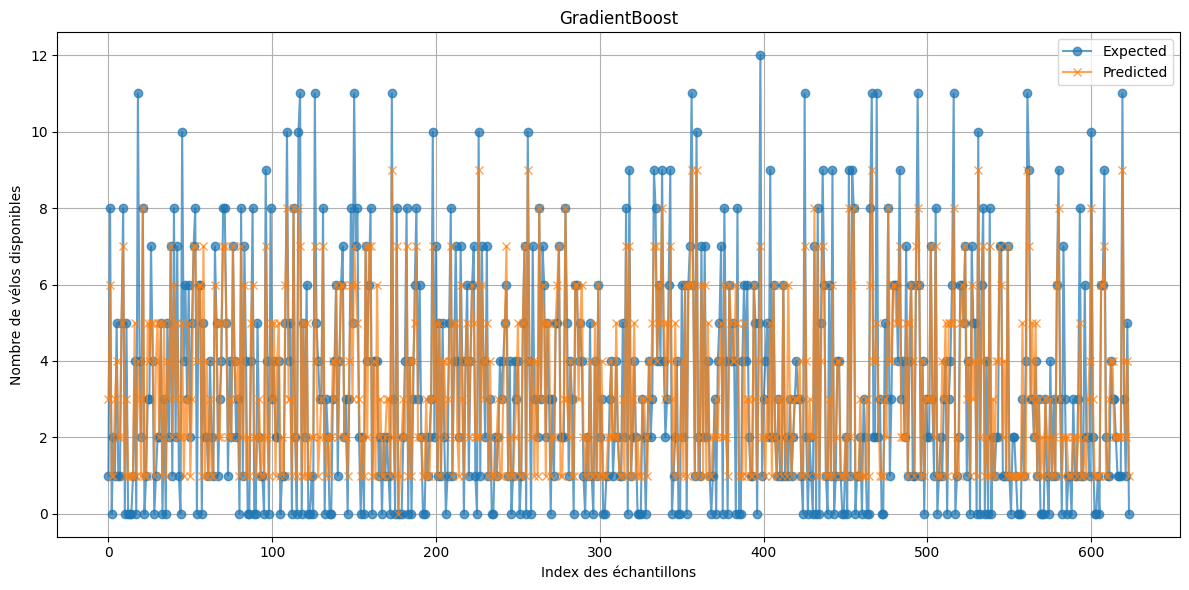

"\n# 4. Analyser l'importance des features\nfeature_importances = rf_model.feature_importances_\nfeature_names = data_x_scaled.columns  # Noms des features\nimportance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})\nimportance_df = importance_df.sort_values(by='Importance', ascending=False)\n\n# Visualiser les importances\nplt.figure(figsize=(10, 6))\nplt.barh(importance_df['Feature'], importance_df['Importance'])\nplt.xlabel('Importance')\nplt.ylabel('Feature')\nplt.title('Feature Importance (Random Forest)')\nplt.gca().invert_yaxis()\nplt.show()\n"

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

model="GradientBoost"
print(model)
# 1. Division des données en train, validation, et test
test_size = 0.2  # 20% pour le test
val_size = 0.2   # 20% pour validation

X_train_full, X_test, y_train_full, y_test = train_test_split(x_scaled, y_scaled, test_size=test_size, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=val_size, random_state=42)



# 2. Entraîner le modèle Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(
    n_estimators=100,       # Nombre d'estimateurs
    learning_rate=0.1,      # Taux d'apprentissage
    max_depth=3,            # Profondeur maximale des arbres
    random_state=42
)
gradient_boosting_model.fit(X_train, y_train.ravel())  # Entraînement

# 3. Validation
y_val_pred = gradient_boosting_model.predict(X_val)
y_val_pred = np.round(y_val_pred).astype(int)
val_mse = mean_squared_error(y_val, y_val_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred) 

print(f"Validation Metrics: MSE={val_mse:.4f}, MAE={val_mae:.4f}, R²={val_r2:.4f}")
 

# 4. Test
y_test_pred = gradient_boosting_model.predict(X_test)
y_test_pred = np.round(y_test_pred).astype(int)
test_mse = mean_squared_error(y_test, y_test_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred) 

print(f"Test Metrics: MSE={test_mse:.4f}, MAE={test_mae:.4f}, R²={test_r2:.4f}")
taux_correct_predictions(y_test,y_test_pred,0)
taux_correct_predictions(y_test,y_test_pred,1)
taux_correct_predictions(y_test,y_test_pred,2)


# Tracer les résultats pour comparer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Expected', linestyle='-', marker='o', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', linestyle='-', marker='x', alpha=0.7)

# Ajout des détails au graphique
plt.title(model)
plt.xlabel("Index des échantillons")
plt.ylabel("Nombre de vélos disponibles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


'''
# 4. Analyser l'importance des features
feature_importances = rf_model.feature_importances_
feature_names = data_x_scaled.columns  # Noms des features
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualiser les importances
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance (Random Forest)')
plt.gca().invert_yaxis()
plt.show()
'''


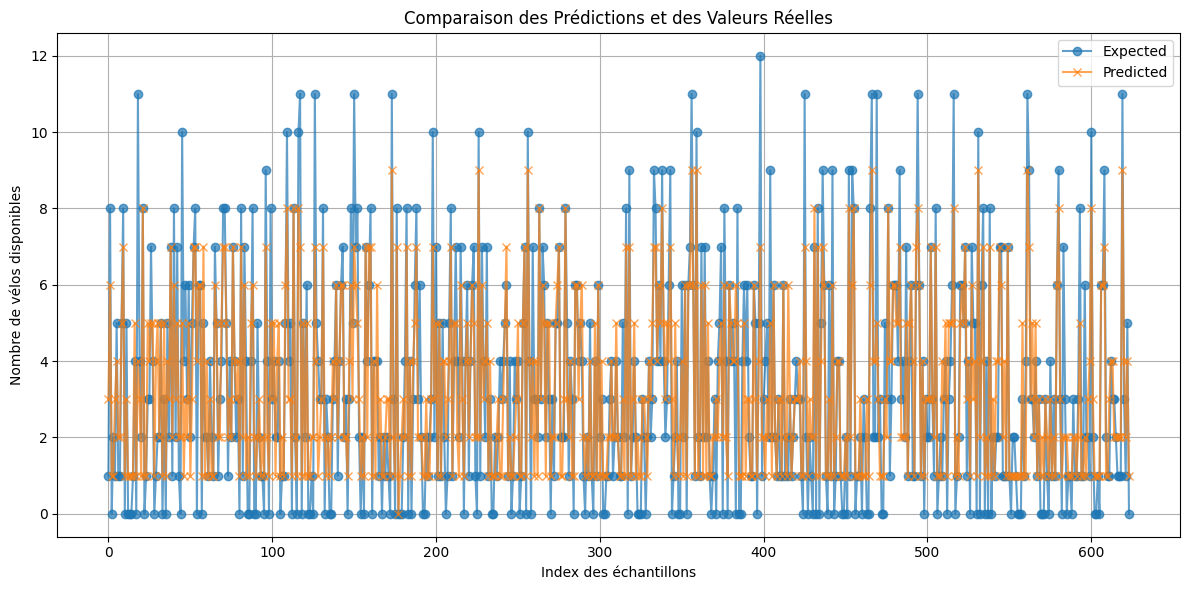

In [52]:
import matplotlib.pyplot as plt

# Tracer les résultats pour comparer les valeurs réelles et prédites
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Expected', linestyle='-', marker='o', alpha=0.7)
plt.plot(range(len(y_test_pred)), y_test_pred, label='Predicted', linestyle='-', marker='x', alpha=0.7)

# Ajout des détails au graphique
plt.title("Comparaison des Prédictions et des Valeurs Réelles")
plt.xlabel("Index des échantillons")
plt.ylabel("Nombre de vélos disponibles")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
